TASK 1
=

Read the rr_temp_rh_24_30May21.csv. The file contains gridded data, the columns describe lat: latitude and lon: longitude for each datapoint, rr: total rainfall, tn weekly-mean daily-minimum temperature, tx: weekly-mean daily-maximum temperature and rh mean relative humidity

1.Generate spatial map for rainfall, maximum and minimum temperature and relative humidity

2.Save figure to pdf and png

3.Interpret the figures


In [2]:
# importing packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.io.shapereader as shapereader
import pandas as pd
# from cartopy.mpl.gridliner import LONGITUDE_FOFMATTER, LATITUDE_FORMATTER

In [5]:
temp = np.genfromtxt('rr_temp_rh_24_30May21.csv', delimiter=",", skip_header=1, usecols=[])
# stn = np.genfromtxt("rr_temp_rh_24_30May21.csv", delimiter=",", skip_header=1, usecols=[], dtype='str')

lon = temp[:, 0]
lat = temp[:, 1]
rr = temp[:, 2]
tx = temp[:,3]
tn = temp[:,4]
rh = temp[:,5]

In [6]:
lat

array([-0.280419 , -0.380419 , -0.280419 , ..., -2.0804191, -2.0304191,
       -1.980419 ])

In [7]:
# reading the shape-file for Ghana's administrative region
adm1_shapes = list(shapereader.Reader(str('gh_wgs16dregions')).geometries())

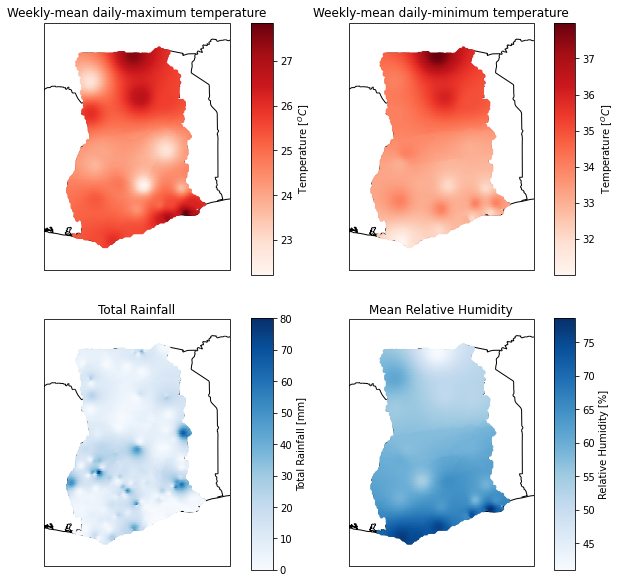

In [11]:
# fig = plt.figure(figsize=(10,10))
# create axes with specific proojection
# axes = plt.axes(projection=ccrs.PlateCarree())

#Alternative 
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,10),subplot_kw={'projection': ccrs.PlateCarree()})
axes[0,0].coastlines()
axes[0,1].coastlines()
axes[1,0].coastlines()
axes[1,1].coastlines()


# set the domain lat lon extent
axes[0,0].set_extent([-4, 2, 4, 12], crs=ccrs.PlateCarree())
axes[0,1].set_extent([-4, 2, 4, 12], crs=ccrs.PlateCarree())
axes[1,0].set_extent([-4, 2, 4, 12], crs=ccrs.PlateCarree())
axes[1,1].set_extent([-4, 2, 4, 12], crs=ccrs.PlateCarree())


# add the administrative borders from the shapefile
axes[0,0].add_geometries(adm1_shapes, ccrs.PlateCarree(), edgecolor='black', facecolor='none', alpha=0.8)
axes[0,1].add_geometries(adm1_shapes, ccrs.PlateCarree(), edgecolor='black', facecolor='none', alpha=0.8)
axes[1,0].add_geometries(adm1_shapes, ccrs.PlateCarree(), edgecolor='black', facecolor='none', alpha=0.8)
axes[1,1].add_geometries(adm1_shapes, ccrs.PlateCarree(), edgecolor='black', facecolor='none', alpha=0.8)


# and add country borders, ocean, land and lake borders from cartopy's set of features
axes[0,0].add_feature(cf.BORDERS)
axes[0,1].add_feature(cf.BORDERS)
axes[1,0].add_feature(cf.BORDERS)
axes[1,1].add_feature(cf.BORDERS)

# axes[0,0].add_feature(cartopy.feature.OCEAN)
# axes[0,0].add_feature(cartopy.feature.LAND, edgecolor='black')
# axes[0,0].add_feature(cf.LAKES, edgecolor='black')


axes[0,0].set(title='Weekly-mean daily-maximum temperature')
axes[0,1].set(title='Weekly-mean daily-minimum temperature')
axes[1,0].set(title='Total Rainfall')
axes[1,1].set(title='Mean Relative Humidity')

splot1 = axes[0,0].scatter(lat,lon,10,c=tn, cmap=cm.get_cmap('Reds'),alpha=1)
splot2 = axes[0,1].scatter(lat,lon,10,c=tx, cmap=cm.get_cmap('Reds'), alpha=1)
splot3 = axes[1,0].scatter(lat,lon,10,c=rr, cmap=cm.get_cmap('Blues'), alpha=1)
splot4 = axes[1,1].scatter(lat,lon,10,c=rh, cmap=cm.get_cmap('Blues'), alpha=1)
#############################################################

#Fixing the colour bars


cb1 = fig.add_axes([0.46, 0.53, 0.03, 0.35])
cbar1 = fig.colorbar(splot1, cax = cb1, label="Temperature [$^OC$]", orientation="vertical")


#####################################################


cb2 = fig.add_axes([0.88, 0.53, 0.03, 0.35])
cbar2 = fig.colorbar(splot2, cax = cb2, label="Temperature [$^OC$]", orientation="vertical")
###########################################


cb3 = fig.add_axes([0.46, 0.12, 0.03, 0.35])
cbar3 = fig.colorbar(splot3, cax = cb3,  label="Total Rainfall [mm]", orientation="vertical")
################################################


cb4 = fig.add_axes([0.88, 0.12, 0.03, 0.35])
cbar4 = fig.colorbar(splot4, cax = cb4,  label="Relative Humidity [%]", orientation="vertical")


############################################
# fig.colorbar(splot,cax = cb, label="Relative Humidity [%]", orientation="vertical", extend='both')
